In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Extracting the info from the dataset 

In [3]:
df= pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
print(df.columns)
print(len(df.columns),'features are present in the training dataset')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
12 features are present in the training dataset


In [5]:
print(df_test.columns)
print(len(df.columns),'features are present in the testing dataset')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
12 features are present in the testing dataset


In [6]:
print(len(df),"records are persent in training dataset")
print(len(df_test),"records are persent in testing dataset")


891 records are persent in training dataset
418 records are persent in testing dataset


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print(df.shape,"shape of training dataset")
print(df_test.shape,"shape of testing dataset")


(891, 12) shape of training dataset
(418, 11) shape of testing dataset


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data pre-processing

In [12]:
df.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()


0

In [14]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [15]:
df_test["Sex"].unique()

array(['male', 'female'], dtype=object)

In [16]:
print(df.isnull().sum())
print('-----------')
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Age"].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [18]:
df_test["Age"] = df["Age"].fillna(df["Age"].median())
df_test["Age"].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [19]:
print(df.isnull().sum())
print('-----------')
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
print(df.Cabin.isnull().sum() / len(df))

0.7710437710437711


Almost 80% of the Cabin data is missing. That probably means only 20% of the passengers had a cabin. This feature should be dropped. 

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.drop(["Cabin","Name","Ticket", "Fare", "PassengerId"],axis = 1, inplace = True)
df_test.drop(["Cabin","Name","Ticket", "Fare", "PassengerId"],axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [23]:
df.Embarked=df.Embarked.map({'S':0,'C':1,'Q':2,'nan':'NaN'})
df.Sex=df.Sex.map({'female':0,'male':1})

In [24]:
print(df['Embarked'].unique())
print(df['Embarked'].nunique())

[0 1 2 nan]
3


In [25]:
Embarked = df['Embarked'].mode()
print(Embarked)

0    0
dtype: object


In [26]:
df['Embarked'] = df['Embarked'].fillna('0')

In [27]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# EDA

In [28]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [29]:
df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
0,0.742038
1,0.188908


In [30]:
df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
0,1.000000
1,0.553571
2,0.389610
0,0.336957


In [31]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [32]:
df[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [33]:
pivot =df.pivot_table("Survived",index = ["Embarked","Pclass","SibSp"], columns = "Sex")
pivot

Sex                           0         1
Embarked Pclass SibSp                    
0        1      0      1.000000  0.321429
                1      0.904762  0.428571
                2      1.000000  1.000000
                3      1.000000  0.000000
         2      0      0.925000  0.100000
                1      0.869565  0.318182
                2      1.000000  0.200000
                3      1.000000       NaN
         3      0      0.487805  0.130435
                1      0.384615  0.187500
                2      0.000000  0.000000
                3      0.125000  0.000000
                4      0.333333  0.125000
                5      0.000000  0.000000
                8      0.000000  0.000000
1        1      0      0.956522  0.343750
                1      1.000000  0.600000
                2      1.000000       NaN
         2      0      1.000000  0.400000
                1      1.000000  0.000000
         3      0      0.692308  0.176471
                1      0.428571  0.500000
                2      1.000000  0.000000
2        1      1      1.000000       NaN
                2           NaN  0.000000
         2      0      1.000000  0.000000
         3      0      0.703704  0.068966
                1      0.800000  0.000000
                2      1.000000  1.000000
                4           NaN  0.000000
0        1      0      1.000000       NaN

array([<AxesSubplot:ylabel='count'>], dtype=object)

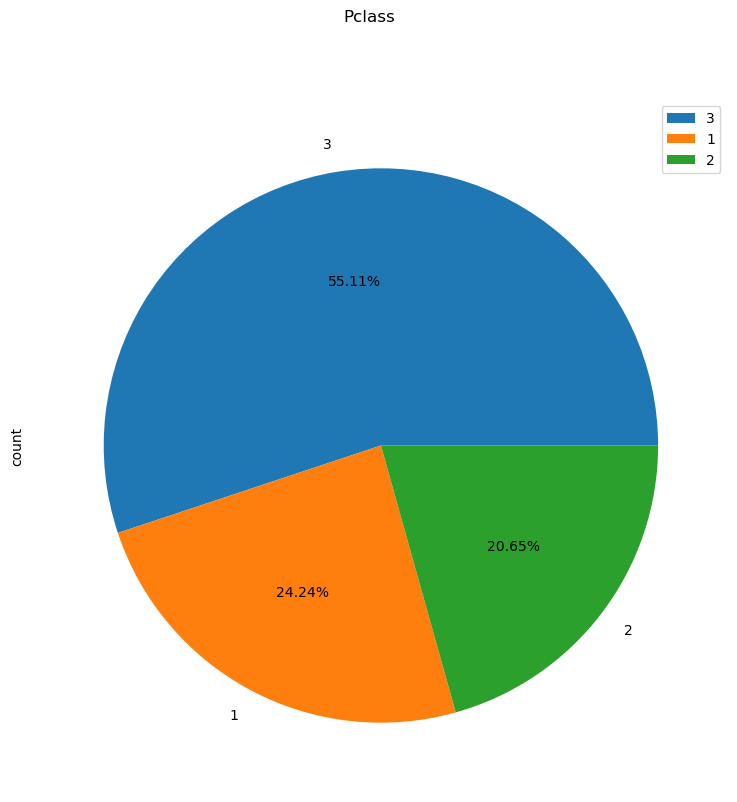

In [34]:
df.groupby('Pclass')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Pclass',figsize=(9,9))


array([<AxesSubplot:ylabel='count'>], dtype=object)

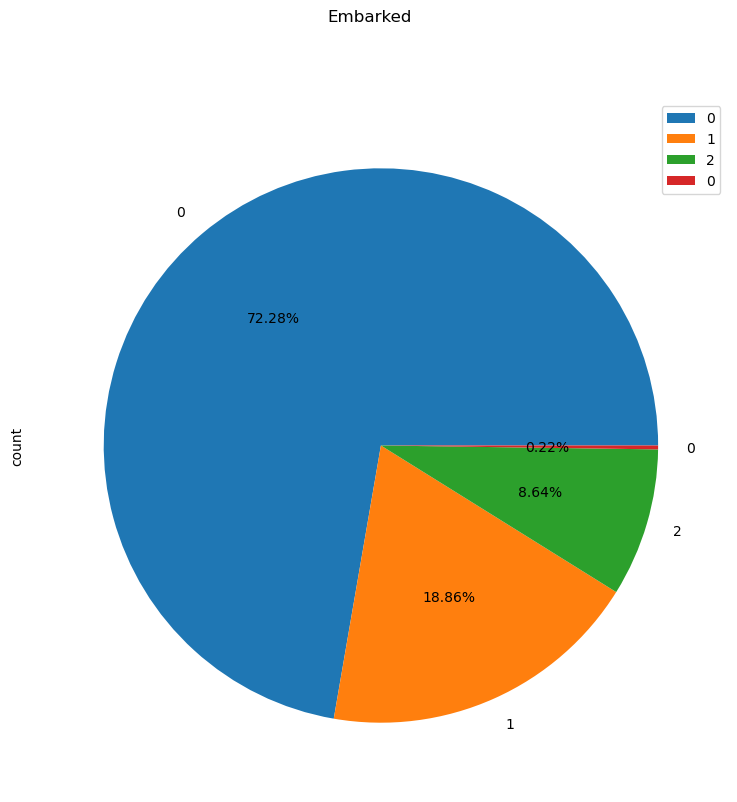

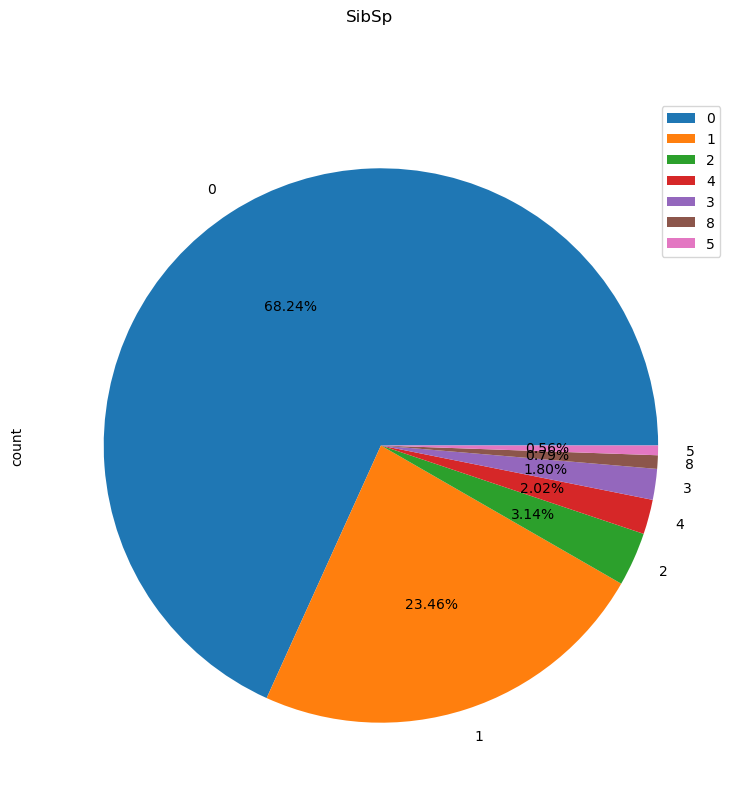

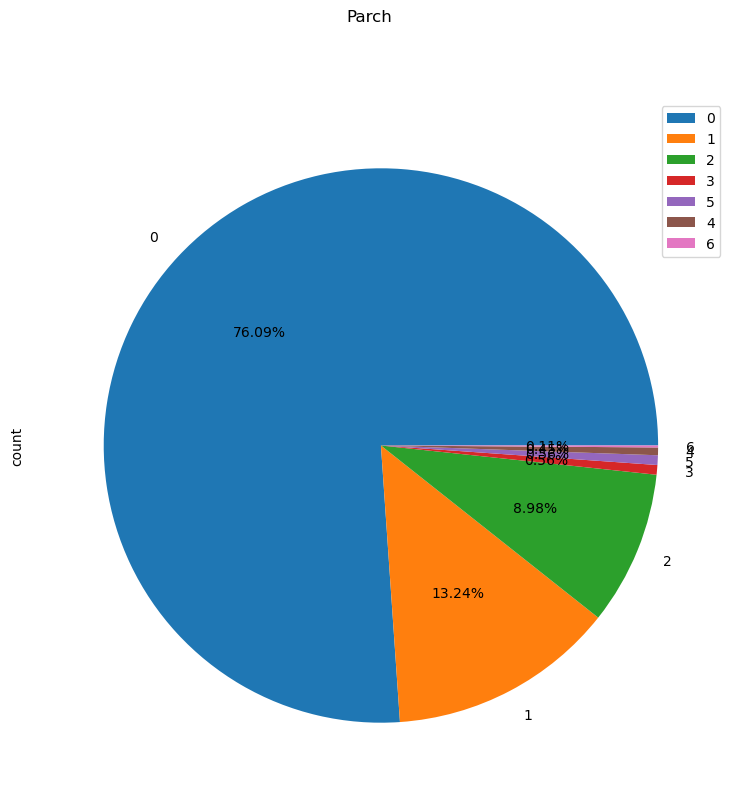

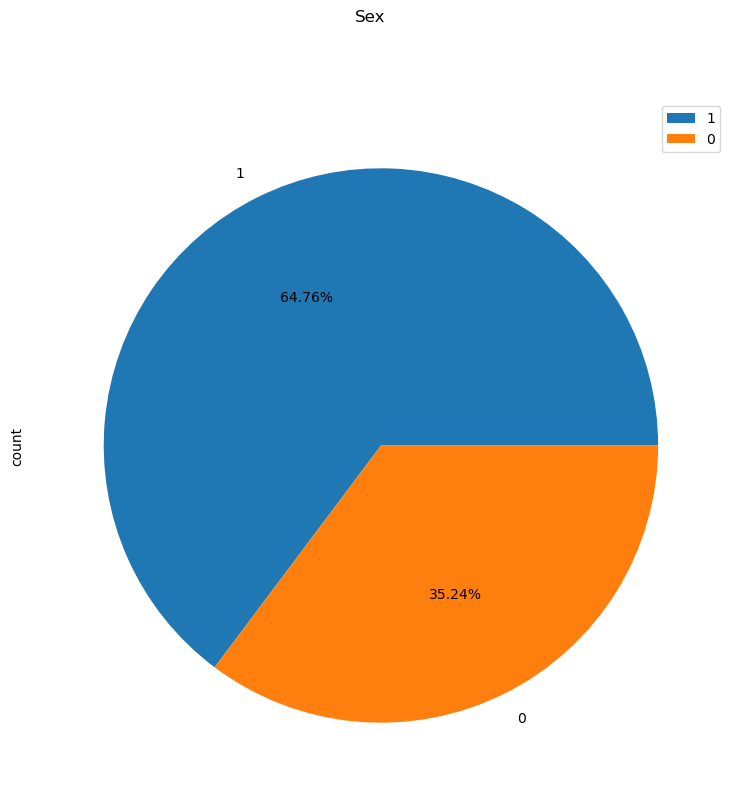

In [35]:
df.groupby('Embarked')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Embarked',figsize=(9,9))
df.groupby('SibSp')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='SibSp',figsize=(9,9))
df.groupby('Parch')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Parch',figsize=(9,9))
df.groupby('Sex')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Sex',figsize=(9,9))



CONCLUSION:
 * It seems that the more you are in a upper class, the more you are likely to survive.
 * Being a female gives a lot of chance to survive compare to male.
 * Being from Cherbourg is a factor a survival. Southampton decreases your chance of survival. This is surprising!
 * Pclass and Sex has a great correlation with the survival of people -> Keep them as features
 * SibSp & Parch require engineering.
 * Having a lot of family makes you less likely to survive. Let's engineer this feature later!

## correaltion


In [36]:
df.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000


<AxesSubplot:>

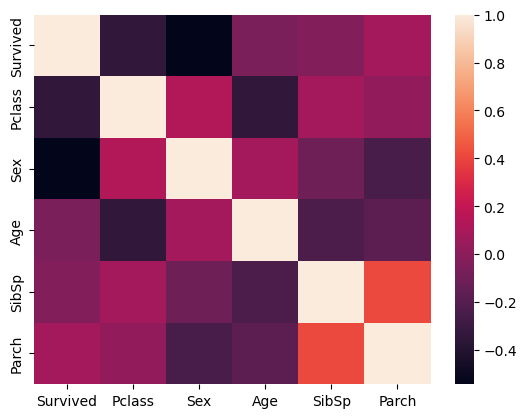

In [37]:
sns.heatmap(df.corr())

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [39]:
X = pd.get_dummies(df[['Sex', 'SibSp', 'Parch', 'Pclass']])
y = df['Survived']

X.head(5)

,Sex,SibSp,Parch,Pclass
0,1,1,0,3
1,0,1,0,1
2,0,0,0,3
3,0,1,0,1
4,1,0,0,3


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
print( X_train.shape, X_test.shape)

(623, 4) (268, 4)


In [42]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

X = np.reshape(['male', 'male', 'female'], (-1, 1))

OrdinalEncoder().fit_transform(X)

array([[1.],
       [1.],
       [0.]])

In [43]:
classifier = svm.SVC(kernel='linear')

In [44]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [46]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7849117174959872


In [47]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [48]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7910447761194029


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

rfr = RandomForestRegressor()

In [50]:
rfr.fit(X_train,y_train)
y_pred =  rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

In [51]:
y_pred

array([0.39621568, 0.10851655, 0.13167357, 1.        , 0.44688269,
       0.96544684, 0.54056312, 0.1556538 , 0.54056312, 0.95107143,
       0.39540774, 0.13167357, 0.03      , 0.13167357, 0.10851655,
       1.        , 0.39540774, 0.54056312, 0.10851655, 0.283936  ,
       0.13167357, 0.283936  , 0.44688269, 0.13167357, 0.13167357,
       0.32242857, 0.283936  , 0.10851655, 0.32242857, 0.54056312,
       0.13167357, 0.54056312, 0.283936  , 0.54056312, 0.13167357,
       0.16808491, 0.283936  , 0.54056312, 0.96544684, 0.13167357,
       0.02470028, 0.16808491, 0.13167357, 0.13167357, 0.71084812,
       0.34200794, 0.13167357, 0.13167357, 0.13167357, 0.83119048,
       0.92466667, 1.        , 0.12516667, 0.51094048, 0.13167357,
       0.95107143, 0.10851655, 1.        , 1.        , 0.54056312,
       0.13167357, 1.        , 0.82177417, 0.283936  , 0.13167357,
       1.        , 0.10851655, 0.13167357, 0.39621568, 1.        ,
       0.99555556, 0.56270238, 0.283936  , 1.        , 0.13167

In [52]:
score = rfr.score(X_train,y_train)
score

0.4712309687675428

In [53]:
y_pred5 = rfr.predict(X_test)
rscore=r2_score(y_test, y_pred)
rscore

0.3868297997397485

In [54]:
print('Explained variance score: %.2f' % explained_variance_score(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Explained variance score: 0.39
Mean squared error: 0.15
Variance score: 0.39


In [55]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.Sex=test_df.Sex.map({'female':0,'male':1})

X_test = pd.get_dummies(test_df[['Sex', 'SibSp', 'Parch', 'Pclass']])


model = classifier.fit(X_train,y_train)
preds = model.predict(X_test)

results = pd.DataFrame({
    'PassengerId': test_df['PassengerId'], 
    'Survived': preds
})

results.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [56]:
results.to_csv('submission.csv', index=False)
print("Successfully Created!")

Successfully Created!


 completed